In [3]:
#OKUL:FATIH SULTAN MEHMET VAKIF UNIVERSITESI
#BOLUM:BILGISAYAR MUHENDISLIGI
#DERS:INTRODUCTION TO MACHINE LEARNING


#-----------TERM PROJECT---------------------
#KONU:MAKINE OĞRENIMIYLE KALP HASTALIGINI TAHMIN ETME
#DATASET:HEART DISEASE
#DATASET LINK:https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset?select=heart.csv
#TASK:CLASSIFICATION 
#NUMARA:1521221055
#ISIM-SOYISIM:ADEM YAVUZ CELIK
#PRGRAMMING LANGUAGE : PYTHON

#Dr. Öğr. Üyesi BERNA KİRAZ

# Libraries
#Csvler ve dataframelerle çalışmak için
import pandas as pd
#Dizilerle çalışmak için
import numpy as np
#Grafikleri çizdirebilmek için
import matplotlib.pyplot as plt
import seaborn as sns
#train test olarak 2 ye bölmek için
from sklearn.model_selection import train_test_split
#performans metrikler için
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score,recall_score
#datayı scale edebilmek için
from sklearn.preprocessing import StandardScaler
#modeller için
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

In [5]:
# Comma Seperated Value dosya tipindeki veri setini okumu
data=pd.read_csv("heart.csv")
#Veri setindeki ilk 5 kayıtı ekrana basma
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [135]:
#Shape yani satır ve sütun.Shape[0] satırları yani instance'ları verir.
print("Number of instance: {}".format(data.shape[0]))
#Shape[1] sütunları yani feature'ları verir.
print("Number of features: {}".format(data.shape[1]))

Number of instance: 303
Number of features: 14


In [145]:
#Missing value var mı?
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [146]:
#yok 2.yol
data.isnull().values.any()

False

1    165
0    138
Name: target, dtype: int64


Text(0, 0.5, 'Amount')

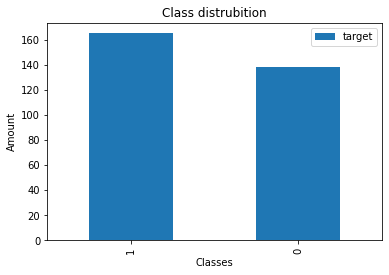

In [156]:
#array şeklinde
classes=data.target.value_counts()
print(classes)
#data frame yaptık
targets=pd.DataFrame(classes)
#görselleştirdik
targets.plot.bar()
plt.title("Class distrubition")
plt.xlabel("Classes")
plt.ylabel("Amount")

Text(0, 0.5, 'Amount')

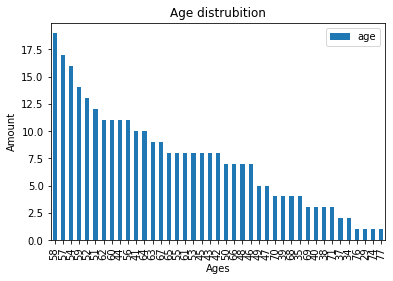

In [153]:
#Target değerlerimiz görüldüğü üzere dengesiz bu yüzden performans metriği olarak accuracy score'u kullanmak anlamsız olcak 
age=pd.DataFrame(data.age.value_counts())
age.plot.bar()
plt.title("Age distrubition")
plt.xlabel("Ages")
plt.ylabel("Amount")

Text(0, 0.5, 'Amount')

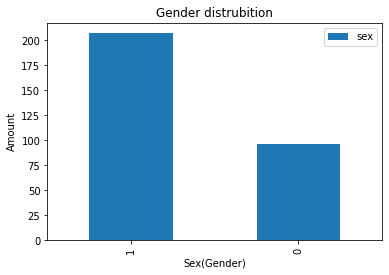

In [154]:
sex=pd.DataFrame(data.sex.value_counts())
sex.plot.bar()
plt.title("Gender distrubition")
plt.xlabel("Sex(Gender)")
plt.ylabel("Amount")

Text(0, 0.5, 'Amount')

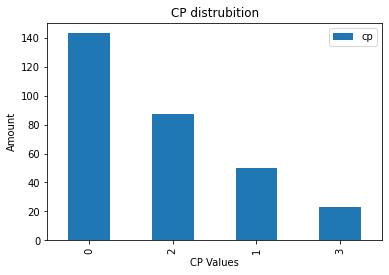

In [109]:
cp=pd.DataFrame(data.cp.value_counts())
cp.plot.bar()
plt.title("CP distrubition")
plt.xlabel("CP Values")
plt.ylabel("Amount")

Text(0, 0.5, 'Amount')

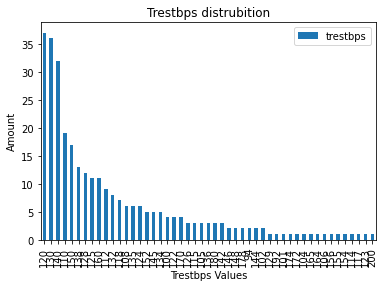

In [110]:
trestbps=pd.DataFrame(data.trestbps.value_counts())
trestbps.plot.bar()
plt.title("Trestbps distrubition")
plt.xlabel("Trestbps Values")
plt.ylabel("Amount")

Text(0, 0.5, 'Amount')

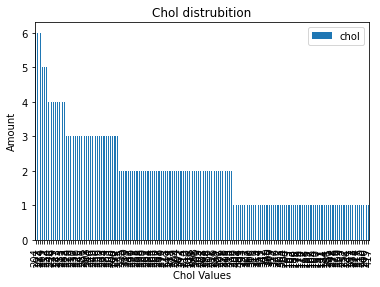

In [111]:
chol=pd.DataFrame(data.chol.value_counts())
chol.plot.bar()
plt.title("Chol distrubition")
plt.xlabel("Chol Values")
plt.ylabel("Amount")

Text(0, 0.5, 'Amount')

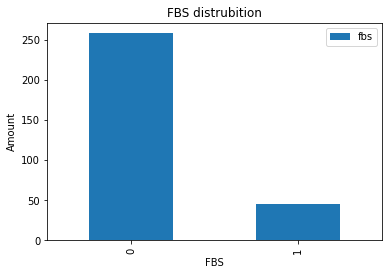

In [112]:
fbs=pd.DataFrame(data.fbs.value_counts())
fbs.plot.bar()
plt.title("FBS distrubition")
plt.xlabel("FBS")
plt.ylabel("Amount")

Text(0, 0.5, 'Amount')

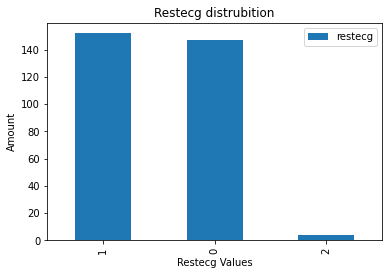

In [113]:
restecg=pd.DataFrame(data.restecg.value_counts())
restecg.plot.bar()
plt.title("Restecg distrubition")
plt.xlabel("Restecg Values")
plt.ylabel("Amount")

Text(0, 0.5, 'Amount')

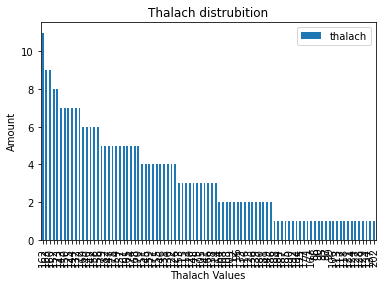

In [114]:
thalach=pd.DataFrame(data.thalach.value_counts())
thalach.plot.bar()
plt.title("Thalach distrubition")
plt.xlabel("Thalach Values")
plt.ylabel("Amount")


Text(0, 0.5, 'Amount')

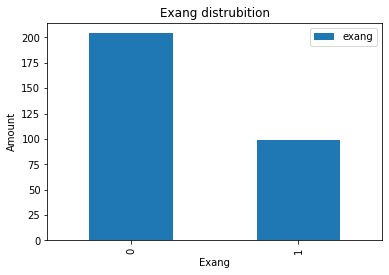

In [115]:
exang=pd.DataFrame(data.exang.value_counts())
exang.plot.bar()
plt.title("Exang distrubition")
plt.xlabel("Exang")
plt.ylabel("Amount")

Text(0, 0.5, 'Amount')

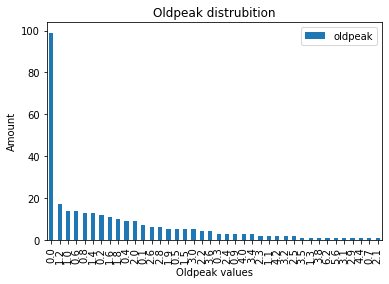

In [116]:
oldpeak=pd.DataFrame(data.oldpeak.value_counts())
oldpeak.plot.bar()
plt.title("Oldpeak distrubition")
plt.xlabel("Oldpeak values")
plt.ylabel("Amount")

Text(0, 0.5, 'Amount')

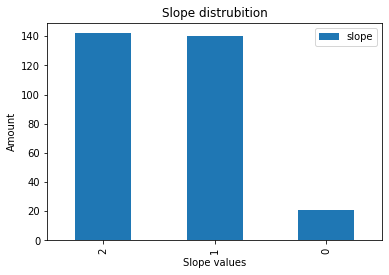

In [117]:
slope=pd.DataFrame(data.slope.value_counts())
slope.plot.bar()
plt.title("Slope distrubition")
plt.xlabel("Slope values")
plt.ylabel("Amount")

Text(0, 0.5, 'Amount')

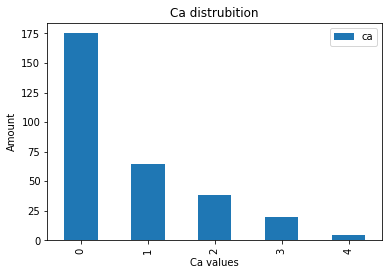

In [118]:
ca=pd.DataFrame(data.ca.value_counts())
ca.plot.bar()
plt.title("Ca distrubition")
plt.xlabel("Ca values")
plt.ylabel("Amount")

Text(0, 0.5, 'Amount')

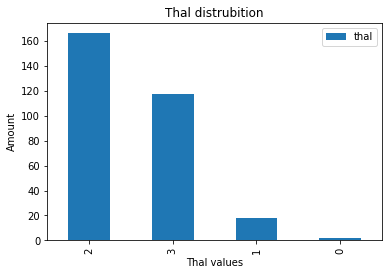

In [119]:
thal=pd.DataFrame(data.thal.value_counts())
thal.plot.bar()
plt.title("Thal distrubition")
plt.xlabel("Thal values")
plt.ylabel("Amount")

In [120]:
#Range,min,max,mean,std verir
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0.5, 1.0, 'Correlation matrix of attiributes')

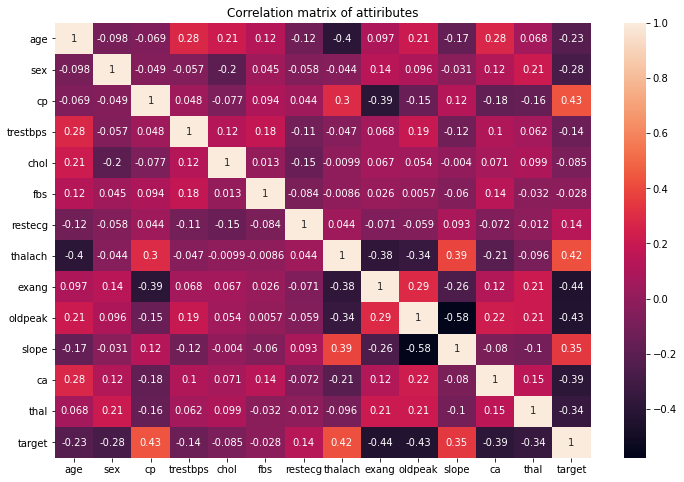

In [121]:
#boş grafik oluşturduk,boyut ayarlama
plt.figure(figsize=(12,8))
#pandas ile corelasyon matrisi oluşturma
cor_matrix=data.corr()
#çizdirme
sns.heatmap(cor_matrix,annot=True)
plt.title("Correlation matrix of attiributes")
# Korelasyon matrisi, özelliklerin birbirleriyle veya hedef değişkenle nasıl ilişkili olduğunu gösterir.
#Burda görüldüğü üzere cp(göğüs ağrısı) ve thalac(max  atışkalp hızı) target ile yüksek oranda ilişkili )"

In [10]:
#verileri feature's ve target olarak bölüyoruz
#13'e kadar al
x=data.iloc[:,:13].values
#sadece 13 al
y=data.iloc[:,13:].values

In [123]:
#standartScaler ile x 'i scale ediyoruz
sc=StandardScaler()
x_scaled=sc.fit_transform(x)

In [124]:
# Datayı train ve test olarak ayırıyoruz
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
#Datayı scale edilmiş halde train ve test olarak ayırıyoruz
X_train,X_test,Y_train,Y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=0)

In [125]:
#Logictic Regression
#Lojistik regresyon sınıflandırma işlemi yapmamızı sağlar.Kategorik veya sayısal verilerin sınıflandırılmasında kullanılır.
#Sonuç değerlerimiz sadece 2 farklı değer alabilmesi durumunda çalışır.Lojistik regresyonun uygulanması,
# yorumlanması daha kolaydır ve eğitilmesi çok verimlidir fakat
#Doğrusal olarak ayrılabilir veriler, gerçek dünya senaryolarında nadiren bulunur.

#lr objesi oluşturuyoruz iterasyon sayısı toplam veriden yüksek olmalı(en az 2 kat)
lr=LogisticRegression(random_state=0,max_iter=1000)
#x_train,y_train ile eğitiyoruz.
lr.fit(x_train,y_train.ravel())
#x_testi predictlemesi için veriyoruz ve bunu lr_predicte atıyoruz
lr_predict=lr.predict(x_test)
#gerçek verilerle  predictleri kıyaslatıyoruz score'u ac_lr'ye atıyoruz
ac_lr=accuracy_score(y_test,lr_predict)
#score'u görmek için yazrıyoruz.
print("Logistic Regression accuracy score is ",ac_lr)
#bir başka performan metrik olan confussion matrix'i oluşturuyoruz
cm_lr=confusion_matrix(y_test,lr_predict)
#confussion matrix 'i yazdırıyoruz
print(cm_lr)
#precission score için 
pc_lr=precision_score(y_test,lr_predict)
#recall score için
rec_lr=recall_score(y_test,lr_predict)
#sonrasında yazdıyırouz.
print("precission score: ",pc_lr)
print("recall score: ",rec_lr)
#f1 score (ters çevrilmiş çarpımları)
f1_lr=f1_score(y_test,lr_predict)
#score yazdırıyoruz.
print("Logistic Regression f1 score: ",f1_lr)

#f1 score eşit olmayan sınıf dağılımı varsa accuracy'nden daha faydalıdır ki benim sınıf dağılımım dengesiz o yüzden burda
#performans metriği olarak confussion matrix kullanmalıyız.Confussion matrix hedef değerleri makine değerleri ile kıyaslayıp
#bir matris döndürür.

#    CONFUSSION MATRIX

#        ACTUAL VALUE
#         POZ  | NEG
#   --------------------
#   P | P      |
#   R | O  TP  |   FP
#   E | Z      |
#     ------------------
#   D | N      |
#   I | E  FN  |   TN
#   C | G      |

#---------------------

#Precission:Doğru tahmin edilen hastalardan kaç tanesi gerçekten pozitif
#Recall:Tahmin ettiklerimizin kaçı gerçekten pozitif
#Problemin tipine göre precission veya recall scorelarıma bakarım ikisinde eşitlik varsa f1 score'uma bakarım

#RECALL:kalp hastalığı olan hastaların kaçı kalp hastası olarak sınıflandırıldı. bu çok önemlidir kalp hastası olan birine
#değilsin demek ölümcüldür.
#PRECİSSİON:Kalp hastası olarak tahmin edilenlerden kaçı gerçekten hasta burda hasta olmayan birine ilaç vermek çokta 
#mühim olmaz diğerine göre bu yüzden benim problemimde recall precissiondan daha önemlidir.
#Ben modelimi recall score'uma göre seçmeliyim.

Logistic Regression accuracy score is  0.8131868131868132
[[32 12]
 [ 5 42]]
precission score:  0.7777777777777778
recall score:  0.8936170212765957
Logistic Regression f1 score:  0.8316831683168316


In [126]:
#Naive Bayes
#Navie Bayes 3 tiptir.Küçük datalarda yüksek performans sağlayabilir,Yüksek boyutlu verilerde iyi çalışabilir fakat 
#Sıfır olasılık problemi ile karşı karşıya kalabilirsiniz. Sıfır olasılık istediğimiz örneğin veri setinde hiç bulunmaması durumu
#Yani herhangi bir işleme alındığında sonucu sıfır yapacaktır.
#-gausionNb -> Eğer özelliklerimiz sürekli verilerden oluşuyorsa bu verilerin bir Gauss dağılımı veya
# diğer bir deyişle normal dağılımdan geldiğini varsayıyoruz.
#-multinomialNb-> çok sınıflı kategorilerde (iyi-orta-kötü gibi) de kullanılmaktadır.
#-bernouilliNb->Burada sınıflar sadece ikili değerlerden (iyi-kötü gibi) oluşmaktadır.
bnb=BernoulliNB()
bnb.fit(X_train,Y_train.ravel())
bnb_predict=bnb.predict(X_test)
ac_bnb=accuracy_score(Y_test,bnb_predict)
print("Naive Bayes (Bernoulli) accuracy score is ",ac_bnb)
cm_bnb=confusion_matrix(Y_test,bnb_predict)
print(cm_bnb)
pc_bnb=precision_score(Y_test,bnb_predict)
rec_bnb=recall_score(Y_test,bnb_predict)
print("precission score: ",pc_bnb)
print("recall score: ",rec_bnb)
f1_bnb=f1_score(Y_test,bnb_predict)
print("Naive Bayes (Bernoulli) f1 score is ",f1_bnb)

Naive Bayes (Bernoulli) accuracy score is  0.8021978021978022
[[33 11]
 [ 7 40]]
precission score:  0.7843137254901961
recall score:  0.851063829787234
Naive Bayes (Bernoulli) f1 score is  0.8163265306122448


In [127]:
#KNN
#KNN Seçtiğimiz komşu sayısına göre kendine en ykaın komşuya bakıyor hangisi daha çoğunluktaysa o gruba dahil edilir.
#Uygulaması basittir,parametre ayarlamaya ek varsayıma gerek yoktur fakat örnek sayısı arttıkça önemli ölçüde yavaşlar 
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,Y_train.ravel())
knn_predict=knn.predict(X_test)
ac_knn=accuracy_score(Y_test,knn_predict)
print("KNN accuracy score is ",ac_knn)
cm_knn=confusion_matrix(Y_test,knn_predict)
print(cm_knn)
pc_knn=precision_score(Y_test,knn_predict)
rec_knn=recall_score(Y_test,knn_predict)
print("precission score: ",pc_knn)
print("recall score: ",rec_knn)
f1_knn=f1_score(Y_test,knn_predict)
print("KNN f1 score is ",f1_knn)

KNN accuracy score is  0.8351648351648352
[[32 12]
 [ 3 44]]
precission score:  0.7857142857142857
recall score:  0.9361702127659575
KNN f1 score is  0.854368932038835


In [128]:
#Conclusion:
#Eşit olmayan bir sınıf dağılımım olduğu için performans metriği olarak confussion matrise bakmak daha yararlı.
#Confussion maatrisimde ise Recall'a bakılmalı çünkü kalp hastalığı olmayan birine kalp hastası demek kötüdür fakat
#kalp hastası olan birine kalp hastası değilsin demek ölümcül bu yüzden recall score'um precision'a göre daha değerli bir metric
#Bu performans metriklerine göre knn modelim diğer modellerime göre daha iyi bir performans göstermiş oluyor.

#reference
#https://medium.com/deep-learning-turkiye/her-%C5%9Feyiyle-lineer-regresyon-makine-%C3%B6%C4%9Frenmesi-serisi-1-1ee2aec10b74
#https://medium.com/@k.ulgen90/makine-%C3%B6%C4%9Frenimi-b%C3%B6l%C3%BCm-2-6d6d120a18e1
#https://datatofish.com/correlation-matrix-pandas/
#https://analyticsindiamag.com/7-types-classification-algorithms/
#https://www.youtube.com/watch?v=kySc5Wg1Gxw
#https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761
#https://github.com/f2005636/Classification/blob/master/03%20Log_Reg.ipynb
#https://medium.com/capital-one-tech/k-nearest-neighbors-knn-algorithm-for-machine-learning-e883219c8f26
